In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle

In [66]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [2]:
# data = pd.read_pickle('final_data.pkl')
data = pd.read_csv('cleaned_new.csv')

/home/ankish/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,31,46,64,76,86,108,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38398 entries, 0 to 38397
Columns: 120 entries, Unnamed: 0 to test
dtypes: float64(99), int64(9), object(12)
memory usage: 35.2+ MB


In [4]:
# data.columns

Index(['Retention Status', 'Region', 'Plan Start Year-month',
       'Transaction Year-month', 'Contract Multi-Year (Y/N)', 'Multi-Year In',
       'Inquiry Eligible Flag (Y/N)', 'Document_Read_12', 'Document_Read_11',
       'Document_Read_10',
       ...
       '1:1_Meeting_5', '1:1_Meeting_4', '1:1_Meeting_3', '1:1_Meeting_2',
       '1:1_Meeting_1', '1:1_Meeting_0', 'Onboarding Satus(Y/N)', 'test_code',
       'test', 'test1'],
      dtype='object', length=120)

In [5]:
# data.head()

,Retention Status,Region,Plan Start Year-month,Transaction Year-month,Contract Multi-Year (Y/N),Multi-Year In,Inquiry Eligible Flag (Y/N),Document_Read_12,Document_Read_11,Document_Read_10,Document_Read_9,Document_Read_8,Document_Read_7,Document_Read_6,Document_Read_5,Document_Read_4,Document_Read_3,Document_Read_2,Document_Read_1,Document_Read_0,Total_Document_Read_13,Document_Read_Last120_Flag (Y/N),Inquiry_Done_12,Inquiry_Done_11,Inquiry_Done_10,Inquiry_Done_9,Inquiry_Done_8,Inquiry_Done_7,Inquiry_Done_6,Inquiry_Done_5,Inquiry_Done_4,Inquiry_Done_3,Inquiry_Done_2,Inquiry_Done_1,Inquiry_Done_0,Total_Inquiry_Done_12,Inquiry_Done_Last120_Flag (Y/N),View_Peer_12,View_Peer_11,View_Peer_10,View_Peer_9,View_Peer_8,View_Peer_7,View_Peer_6,View_Peer_5,View_Peer_4,View_Peer_3,View_Peer_2,View_Peer_1,View_Peer_0,...,Conference_Attended_7,Conference_Attended_6,Conference_Attended_5,Conference_Attended_4,Conference_Attended_3,Conference_Attended_2,Conference_Attended_1,Conference_Attended_0,Symposium_Attended_Flag(Y/N),Symposium_Attended_11,Symposium_Attended_10,Symposium_Attended_9,Symposium_Attended_8,Symposium_Attended_7,Symposium_Attended_6,Symposium_Attended_5,Symposium_Attended_4,Symposium_Attended_3,Symposium_Attended_2,Symposium_Attended_1,Symposium_Attended_0,Testimonial_Flag(Y/N),Testimonial_11,Testimonial_10,Testimonial_9,Testimonial_8,Testimonial_7,Testimonial_6,Testimonial_5,Testimonial_4,Testimonial_3,Testimonial_2,Testimonial_1,Testimonial_0,1:1_Meeting_11,1:1_Meeting_10,1:1_Meeting_9,1:1_Meeting_8,1:1_Meeting_7,1:1_Meeting_6,1:1_Meeting_5,1:1_Meeting_4,1:1_Meeting_3,1:1_Meeting_2,1:1_Meeting_1,1:1_Meeting_0,Onboarding Satus(Y/N),test_code,test,test1
0,1,Region D,201609,201701,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,0.0,13.0,21.0,Y,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,21.0,21.0
1,0,Region B,201609,201701,0,0,3,0,66.0,48.0,37.0,41.0,29.0,0.0,95.0,49.0,41.0,42.0,34.0,84.0,0.0,Y,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,9.0,10.0,0.0,2.0,0.0,0.0,Y,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,566.0,0.0
2,1,Region B,201609,201701,1,1,3,0,0.0,2.0,21.0,8.0,20.0,14.0,4.0,14.0,12.0,5.0,0.0,4.0,104.0,Y,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,104.0,104.0
3,1,Region A,201609,201701,1,1,3,0,1.0,7.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,19.0,Y,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,19.0,19.0
4,0,Region C,201609,201701,0,0,3,0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,8.0,3.0,0.0,0.0,20.0,Y,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,Y,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20.0,20.0


In [4]:
# data['Region'].unique()

array([3, 1, 0, 2])

In [11]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()

# enc_labels1 = enc.fit_transform(data['Region'])
# enc_mappings1 = {index: label for index, label in 
#                   enumerate(enc.classes_)}
# print(enc_labels1,enc_mappings1)



[3 1 1 ... 2 3 2] {0: 'Region A', 1: 'Region B', 2: 'Region C', 3: 'Region D'}


In [12]:
# data['Region'] = enc.fit_transform(data['Region'])

In [15]:
# data['Inquiry_Done_Last120_Flag (Y/N)'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
# enc_labels1 = enc.fit_transform(data['Inquiry_Done_Last120_Flag (Y/N)'])
# enc_mappings1 = {index: label for index, label in 
#                   enumerate(enc.classes_)}
# print(enc_labels1,enc_mappings1)


[0 1 0 ... 0 0 0] {0: 'N', 1: 'Y'}


In [17]:
# data['Inquiry_Done_Last120_Flag (Y/N)'] = enc.fit_transform(data['Inquiry_Done_Last120_Flag (Y/N)'])

In [18]:
enc_labels1 = enc.fit_transform(data['Document_Read_Last120_Flag (Y/N)'])
enc_mappings1 = {index: label for index, label in 
                  enumerate(enc.classes_)}
print(enc_labels1,enc_mappings1)

[1 1 1 ... 0 1 1] {0: 'N', 1: 'Y'}


In [19]:
# data['Document_Read_Last120_Flag (Y/N)'] = enc.fit_transform(data['Document_Read_Last120_Flag (Y/N)'])

In [ ]:
# data = data.drop(['Plan Start Year-month',])

In [24]:
# data[['Transaction Year-month', 'Contract Multi-Year (Y/N)']]

,Transaction Year-month,Contract Multi-Year (Y/N)
0,201701,0
1,201701,0
2,201701,1
3,201701,1
4,201701,0
5,201701,0
6,201701,0
7,201701,0
8,201701,1
9,201701,0


In [25]:
# data['Contract Multi-Year (Y/N)'].unique()

array([0, 1])

In [26]:
# data = data.drop(['Transaction Year-month', 'Contract Multi-Year (Y/N)', 'Multi-Year In'],axis=1)

In [5]:
['Multi-Year In', 'Retention Status', 'target']

['Multi-Year In', 'Retention Status', 'target']

In [6]:
data = data.drop(['Multi-Year In'],axis=1)

In [28]:
data.to_csv('final_xgboost_prepared.csv')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31486 entries, 0 to 31487
Columns: 117 entries, Retention Status to test1
dtypes: float64(98), int64(10), object(9)
memory usage: 28.3+ MB


In [7]:
col_list = data.columns

In [8]:
data = data[col_list]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38398 entries, 0 to 38397
Columns: 119 entries, Unnamed: 0 to test
dtypes: float64(98), int64(9), object(12)
memory usage: 34.9+ MB


In [10]:
data.dtypes

Unnamed: 0                            int64
1:1_Meeting_0                       float64
1:1_Meeting_1                       float64
1:1_Meeting_10                      float64
1:1_Meeting_11                      float64
1:1_Meeting_2                       float64
1:1_Meeting_3                       float64
1:1_Meeting_4                       float64
1:1_Meeting_5                       float64
1:1_Meeting_6                       float64
1:1_Meeting_7                       float64
1:1_Meeting_8                       float64
1:1_Meeting_9                       float64
Conference_Attended_0               float64
Conference_Attended_1               float64
Conference_Attended_10              float64
Conference_Attended_11               object
Conference_Attended_2               float64
Conference_Attended_3               float64
Conference_Attended_4               float64
Conference_Attended_5               float64
Conference_Attended_6               float64
Conference_Attended_7           

In [11]:
data['Document_Read_12'].unique()

array([0.0, 11.0, 10.0, 12.0, 44.0, 3.0, 4.0, 31.0, 39.0, 29.0, 35.0, 7.0,
       57.0, 8.0, 28.0, 1.0, 48.0, 36.0, 22.0, 2.0, 18.0, 17.0, 5.0, 6.0,
       14.0, 107.0, 15.0, 37.0, 23.0, 27.0, 60.0, 9.0, 56.0, 13.0, 86.0,
       20.0, 63.0, 33.0, 61.0, 177.0, 19.0, 43.0, 26.0, 78.0, 25.0, 93.0,
       16.0, 50.0, 90.0, 41.0, 21.0, 65.0, 42.0, 47.0, 96.0, 34.0, 30.0,
       24.0, 67.0, 400.0, 58.0, 32.0, 75.0, 74.0, 45.0, 526.0, 88.0,
       314.0, 222.0, 38.0, 68.0, 94.0, 54.0, 124.0, 40.0, 46.0, 66.0,
       104.0, 140.0, 64.0, 136.0, 52.0, 70.0, 62.0, 230.0, 128.0, 126.0,
       80.0, 98.0, 170.0, 146.0, 76.0, 132.0, 130.0, 102.0, 154.0, 92.0,
       135.0, 152.0, 49.0, 123.0, 122.0, 148.0, 250.0, 286.0, 157.0,
       316.0, 298.0, 100.0, 72.0, 84.0, 232.0, 120.0, 108.0, 71.0, 204.0,
       488.0, 220.0, 134.0, 82.0, 680.0, 236.0, 174.0, 696.0, 162.0,
       288.0, 164.0, 208.0, 332.0, 73.0, 114.0, 178.0, 274.0, 188.0,
       169.0, 51.0, 87.0, 69.0, 55.0, 53.0, 131.0, 106.0, 91.0, 9

In [36]:
data['View_Peer_12'].unique()

array([0.0, 1.0, 7.0, 11.0, 28.0, 4.0, 2.0, 3.0, 15.0, 8.0, 5.0, 13.0,
       12.0, 6.0, 9.0, 20.0, 17.0, 14.0, 35.0, 26.0, 22.0, 18.0, 10.0,
       16.0, 21.0, 37.0, 29.0, 38.0, 24.0, 19.0, 41.0, 25.0, 105.0, 32.0,
       100.0, 50.0, 48.0, 27.0, 23.0, 30.0, 33.0, 31.0, 43.0, 42.0, 69.0,
       '0', '10', '7', '12', '1', '2', '4', '5', '3', '9', '8', '13',
       '107', '15', '32', '6', '94', '16', '27', '21', '17', '201', '19',
       '11', '41', '26', '14', '31', '28', '18', '23', '22', '35', '38',
       '20', '40', '24', '75'], dtype=object)

In [37]:
data['View_Peer_Last120_Flag(Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [61]:
data['Service_desk_call_11'].unique()

array([0., 1., 2., 4., 3., 6., 5., 8., 7.])

In [40]:
data['Conference_Attended_11'].unique()

array([0.0, 1.0, 2.0, '0', '1'], dtype=object)

In [41]:
data['Testimonial_Flag(Y/N)'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
data['Testimonial_0'].unique()

array([0.0, 1.0, 2.0, '0', '2', '1', '3'], dtype=object)

In [43]:
data.groupby(['Testimonial_0'])['Retention Status'].unique()

Testimonial_0
0.0    [1, 0]
1.0    [1, 0]
2.0    [1, 0]
0      [1, 0]
1      [1, 0]
2      [1, 0]
3         [1]
Name: Retention Status, dtype: object

In [12]:
# data['Testimonial_0'].to_numeric()

In [28]:
col_list = []
object_list = data.dtypes == object
for index,col_bool in enumerate(object_list):
    if col_bool is True:
        col_list.append(index)
        print(index)
# for i,j in enumerate(data.dtypes == object):
#     if j is True:
#         print(i)

15
30
39
45
54
62
74
84
96
106
115
116


In [23]:
data = data.drop(['Unnamed: 0'],axis=1)

In [24]:
data.dtypes

1:1_Meeting_0                       float64
1:1_Meeting_1                       float64
1:1_Meeting_10                      float64
1:1_Meeting_11                      float64
1:1_Meeting_2                       float64
1:1_Meeting_3                       float64
1:1_Meeting_4                       float64
1:1_Meeting_5                       float64
1:1_Meeting_6                       float64
1:1_Meeting_7                       float64
1:1_Meeting_8                       float64
1:1_Meeting_9                       float64
Conference_Attended_0               float64
Conference_Attended_1               float64
Conference_Attended_10              float64
Conference_Attended_11               object
Conference_Attended_2               float64
Conference_Attended_3               float64
Conference_Attended_4               float64
Conference_Attended_5               float64
Conference_Attended_6               float64
Conference_Attended_7               float64
Conference_Attended_8           

In [37]:
col_name_list = []
for i in col_list:
    print(data.columns[i])
    col_name_list.append(data.columns[i])

Conference_Attended_11
Document_Read_12
Document_Read_Last120_Flag (Y/N)
Inquiry_Done_12
Inquiry_Done_Last120_Flag (Y/N)
Service_desk_call_11
Symposium_Attended_11
Testimonial_0
Testimonial_Flag(Y/N)
View_Peer_12
View_Peer_Last120_Flag(Y/N)
target


In [39]:
data[col_name_list]

,Conference_Attended_11,Document_Read_12,Document_Read_Last120_Flag (Y/N),Inquiry_Done_12,Inquiry_Done_Last120_Flag (Y/N),Service_desk_call_11,Symposium_Attended_11,Testimonial_0,Testimonial_Flag(Y/N),View_Peer_12,View_Peer_Last120_Flag(Y/N),target
0,0,0,Y,0,N,0,0,0,No,0,Y,Retained
1,0,0,Y,0,Y,0,0,0,No,0,Y,Dropped
2,0,0,Y,0,N,0,0,0,No,0,N,Retained
3,0,0,Y,0,N,0,0,0,Yes,0,Y,Retained
4,0,0,Y,0,Y,0,0,0,No,0,N,Dropped
5,0,0,Y,0,N,1,0,0,No,0,Y,Retained
6,0,0,N,0,Y,0,0,0,No,0,N,Retained
7,0,0,Y,0,N,0,0,0,No,0,N,Retained
8,0,0,Y,0,Y,0,0,0,No,0,N,Retained
9,0,0,Y,0,N,0,0,0,No,0,Y,Retained


In [43]:
data.isnull().any()

1:1_Meeting_0                       False
1:1_Meeting_1                       False
1:1_Meeting_10                      False
1:1_Meeting_11                      False
1:1_Meeting_2                       False
1:1_Meeting_3                       False
1:1_Meeting_4                       False
1:1_Meeting_5                       False
1:1_Meeting_6                       False
1:1_Meeting_7                       False
1:1_Meeting_8                       False
1:1_Meeting_9                       False
Conference_Attended_0               False
Conference_Attended_1               False
Conference_Attended_10              False
Conference_Attended_11              False
Conference_Attended_2               False
Conference_Attended_3               False
Conference_Attended_4               False
Conference_Attended_5               False
Conference_Attended_6               False
Conference_Attended_7               False
Conference_Attended_8               False
Conference_Attended_9             

In [44]:
col_name_list

['Conference_Attended_11',
 'Document_Read_12',
 'Document_Read_Last120_Flag (Y/N)',
 'Inquiry_Done_12',
 'Inquiry_Done_Last120_Flag (Y/N)',
 'Service_desk_call_11',
 'Symposium_Attended_11',
 'Testimonial_0',
 'Testimonial_Flag(Y/N)',
 'View_Peer_12',
 'View_Peer_Last120_Flag(Y/N)',
 'target']

In [45]:
data.Conference_Attended_11.unique()

array([0.0, 1.0, 2.0, '0', '1', 'N', '1.0'], dtype=object)

In [52]:
data.Conference_Attended_11.iloc[28832]=0

/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
data.Conference_Attended_11.iloc[29432] = 0

/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
data.Conference_Attended_11.unique()

array([0.0, 1.0, 2.0, '0', '1', '1.0'], dtype=object)

In [48]:
np.where(data.Conference_Attended_11 == 'N')

(array([28832, 29432]),)

In [56]:
data['Conference_Attended_11'] = pd.to_numeric(data['Conference_Attended_11'])

In [59]:
data['Testimonial_0'].unique(),data['Testimonial_Flag(Y/N)'].unique()

(array([0.0, 1.0, 2.0, '0', '2', '1', '3', 'RED', '1.0'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [58]:
np.where(data['Testimonial_0'] == 'RED')

(array([28832, 29432]),)

In [60]:
data.index[18832]

18832

In [61]:
data = data.drop(data.index[[28832,29432]])

In [62]:
np.where(data['Testimonial_0'] == 'RED')

(array([], dtype=int64),)

In [63]:
data['Testimonial_0'] = pd.to_numeric(data['Testimonial_0'])

In [51]:
enc_labels1 = enc.fit_transform(data['Testimonial_Flag(Y/N)'])
enc_mappings1 = {index: label for index, label in 
                  enumerate(enc.classes_)}
print(enc_labels1,enc_mappings1)

[0 0 0 ... 0 0 1] {0: 'No', 1: 'Yes'}


In [67]:
data['Testimonial_Flag(Y/N)'] = enc.fit_transform(data['Testimonial_Flag(Y/N)'])

In [68]:
data.View_Peer_12.unique()

array([0.0, 1.0, 7.0, 11.0, 28.0, 4.0, 2.0, 3.0, 15.0, 8.0, 5.0, 13.0,
       12.0, 6.0, 9.0, 20.0, 17.0, 14.0, 35.0, 26.0, 22.0, 18.0, 10.0,
       16.0, 21.0, 37.0, 29.0, 38.0, 24.0, 19.0, 41.0, 25.0, 105.0, 32.0,
       100.0, 50.0, 48.0, 27.0, 23.0, 30.0, 33.0, 31.0, 43.0, 42.0, 69.0,
       '0', '10', '7', '12', '1', '2', '4', '5', '3', '9', '8', '13',
       '107', '15', '32', '6', '94', '16', '27', '21', '17', '201', '19',
       '11', '41', '26', '14', '31', '28', '18', '23', '22', '35', '38',
       '20', '40', '24', '75', '4.0', '10.0', '2.0', '1.0', '3.0', '7.0',
       '9.0', '11.0', '5.0', '6.0', '8.0', '14.0', '13.0', '21.0', '31.0',
       '23.0', '17.0', '43.0', '15.0', '16.0', '42.0', 75.0, 72.0, 49.0],
      dtype=object)

In [69]:
data['View_Peer_12'] = pd.to_numeric(data['View_Peer_12'])

In [71]:
# data.Document_Read_12.unique()

In [72]:
data['Document_Read_12'] = pd.to_numeric(data['Document_Read_12'])

In [74]:
data['View_Peer_Last120_Flag(Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [76]:
data['View_Peer_Last120_Flag(Y/N)'] = enc.fit_transform(data['View_Peer_Last120_Flag(Y/N)'])

In [77]:
data['View_Peer_Last120_Flag(Y/N)'].unique()

array([1, 0])

In [79]:
col_name_list

['Conference_Attended_11',
 'Document_Read_12',
 'Document_Read_Last120_Flag (Y/N)',
 'Inquiry_Done_12',
 'Inquiry_Done_Last120_Flag (Y/N)',
 'Service_desk_call_11',
 'Symposium_Attended_11',
 'Testimonial_0',
 'Testimonial_Flag(Y/N)',
 'View_Peer_12',
 'View_Peer_Last120_Flag(Y/N)',
 'target']

In [80]:
col_name_list.remove('View_Peer_Last120_Flag(Y/N)')

In [81]:
col_name_list.remove('Document_Read_12')
col_name_list.remove('View_Peer_12')
col_name_list.remove('Testimonial_Flag(Y/N)')
col_name_list.remove('Testimonial_0')
col_name_list.remove('Conference_Attended_11')

In [82]:
col_name_list

['Document_Read_Last120_Flag (Y/N)',
 'Inquiry_Done_12',
 'Inquiry_Done_Last120_Flag (Y/N)',
 'Service_desk_call_11',
 'Symposium_Attended_11',
 'target']

In [84]:
data['Document_Read_Last120_Flag (Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [86]:
data['Document_Read_Last120_Flag (Y/N)'] = enc.fit_transform(data['Document_Read_Last120_Flag (Y/N)'])

In [87]:
col_name_list.remove('Document_Read_Last120_Flag (Y/N)')

In [88]:
data['Inquiry_Done_12'].unique()

array([0.0, 1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 19.0, 13.0, 7.0, 8.0, 9.0, 18.0,
       '0', '2', '1', '3', '4', '6', '5', '8', '7', '13', '14', '22',
       '11', '9', '1.0', '4.0', '3.0', '2.0', '5.0', '7.0', '18.0', 22.0,
       11.0, 14.0, 15.0], dtype=object)

In [89]:
data['Inquiry_Done_12'] = pd.to_numeric(data['Inquiry_Done_12'])

In [90]:
col_name_list.remove('Inquiry_Done_12')

In [91]:
data['Inquiry_Done_Last120_Flag (Y/N)'].unique()

array(['N', 'Y'], dtype=object)

In [92]:
data['Inquiry_Done_Last120_Flag (Y/N)'] = enc.fit_transform(data['Inquiry_Done_Last120_Flag (Y/N)'])

In [93]:
col_name_list.remove('Inquiry_Done_Last120_Flag (Y/N)')

In [94]:
data['Service_desk_call_11'].unique()

array([0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 8.0, 7.0, '1', '0', '2', '3',
       '4', '5', '1.0', '2.0', '3.0', '7.0', '4.0'], dtype=object)

In [95]:
data['Symposium_Attended_11'].unique()

array([0.0, 1.0, '0'], dtype=object)

In [96]:
data['Symposium_Attended_11'] = pd.to_numeric(data['Symposium_Attended_11'])

In [97]:
data['Inquiry_Done_Last120_Flag (Y/N)'] = pd.to_numeric(data['Inquiry_Done_Last120_Flag (Y/N)'])

In [100]:
data['Retention Status'].unique(),data['target'].unique()

(array([ 1.,  0., nan]), array(['Retained', 'Dropped', nan], dtype=object))

In [104]:
data.shape, (31488+6910-2)

((38396, 118), 38396)

In [78]:
# data['View_Peer_Last120_Flag(Y/N)'] = pd.to_numeric(data['View_Peer_Last120_Flag(Y/N)'])

In [47]:
data.groupby(pd.to_numeric(data['Testimonial_0']))['Retention Status'].unique()

Testimonial_0
0.0    [1, 0]
1.0    [1, 0]
2.0    [1, 0]
3.0       [1]
Name: Retention Status, dtype: object

In [50]:
data.groupby(['Conference_Attended_11'])['Retention Status'].unique()

Conference_Attended_11
0.0    [1, 0]
1.0    [1, 0]
2.0    [0, 1]
Name: Retention Status, dtype: object

In [53]:
data.groupby(['Testimonial_Flag(Y/N)'])['Retention Status'].unique()

Testimonial_Flag(Y/N)
0    [1, 0]
1    [1, 0]
Name: Retention Status, dtype: object

In [55]:
data.groupby(['Service_desk_call_11'])['Retention Status'].unique()

Service_desk_call_11
0.0    [1, 0]
1.0    [1, 0]
2.0    [1, 0]
3.0    [0, 1]
4.0    [0, 1]
5.0    [0, 1]
6.0    [1, 0]
7.0       [1]
8.0       [1]
Name: Retention Status, dtype: object

In [60]:
# data.groupby(['View_Peer_12'])['Retention Status'].unique()

In [105]:
data.dtypes

1:1_Meeting_0                       float64
1:1_Meeting_1                       float64
1:1_Meeting_10                      float64
1:1_Meeting_11                      float64
1:1_Meeting_2                       float64
1:1_Meeting_3                       float64
1:1_Meeting_4                       float64
1:1_Meeting_5                       float64
1:1_Meeting_6                       float64
1:1_Meeting_7                       float64
1:1_Meeting_8                       float64
1:1_Meeting_9                       float64
Conference_Attended_0               float64
Conference_Attended_1               float64
Conference_Attended_10              float64
Conference_Attended_11              float64
Conference_Attended_2               float64
Conference_Attended_3               float64
Conference_Attended_4               float64
Conference_Attended_5               float64
Conference_Attended_6               float64
Conference_Attended_7               float64
Conference_Attended_8           

In [64]:
'View_Peer_Last120_Flag(Y/N)','Symposium_Attended_11'

('View_Peer_Last120_Flag(Y/N)', 'Symposium_Attended_11')

In [66]:
enc_labels1 = enc.fit_transform(data['View_Peer_Last120_Flag(Y/N)'])
enc_mappings1 = {index: label for index, label in 
                  enumerate(enc.classes_)}
print(enc_labels1,enc_mappings1)

[1 1 0 ... 0 0 0] {0: 'N', 1: 'Y'}


In [67]:
data['View_Peer_Last120_Flag(Y/N)'] = enc.fit_transform(data['View_Peer_Last120_Flag(Y/N)'])

In [69]:
data['Symposium_Attended_11'].unique()

array([0.0, 1.0, '0'], dtype=object)

In [70]:
data['Symposium_Attended_11'] = pd.to_numeric(data['Symposium_Attended_11'])

In [75]:
data.dtypes

Retention Status                      int64
Region                                int64
Plan Start Year-month                 int64
Inquiry Eligible Flag (Y/N)           int64
Document_Read_12                    float64
Document_Read_11                    float64
Document_Read_10                    float64
Document_Read_9                     float64
Document_Read_8                     float64
Document_Read_7                     float64
Document_Read_6                     float64
Document_Read_5                     float64
Document_Read_4                     float64
Document_Read_3                     float64
Document_Read_2                     float64
Document_Read_1                     float64
Document_Read_0                     float64
Total_Document_Read_13              float64
Document_Read_Last120_Flag (Y/N)      int64
Inquiry_Done_12                      object
Inquiry_Done_11                     float64
Inquiry_Done_10                     float64
Inquiry_Done_9                  

In [106]:
data.to_csv('final_float_int_cleaned_new.csv')

In [73]:
data['View_Peer_0'].astype('float16')

0         3.0
1         0.0
2         0.0
3         1.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         1.0
10        3.0
11        0.0
12        2.0
13        0.0
14        0.0
15        0.0
16        1.0
17        0.0
18        0.0
19        1.0
20        0.0
21        0.0
22        0.0
23        1.0
24        0.0
25        0.0
26        1.0
27        0.0
28        2.0
29        0.0
30       32.0
31        0.0
32        0.0
33        0.0
34        0.0
35        0.0
36        0.0
37        2.0
38        0.0
39        0.0
40        0.0
41        0.0
42        0.0
43        0.0
44        0.0
45        0.0
46        0.0
47       10.0
48        0.0
49        0.0
50        0.0
51        0.0
52        0.0
53        6.0
54        0.0
55        2.0
56        0.0
57        0.0
58        1.0
59        0.0
60        0.0
61        0.0
62        6.0
63        0.0
64        0.0
65        0.0
66        1.0
67        0.0
68        0.0
69        0.0
70        0.0
71    

In [107]:
for index,col in enumerate(data.dtypes):
    if col == np.int64:
#         print(data.columns[index])
        data[data.columns[index]] = data[data.columns[index]].astype('int16')
    if col == np.float64:
        data[data.columns[index]] = data[data.columns[index]].astype('float16')

In [108]:
data.dtypes

1:1_Meeting_0                       float16
1:1_Meeting_1                       float16
1:1_Meeting_10                      float16
1:1_Meeting_11                      float16
1:1_Meeting_2                       float16
1:1_Meeting_3                       float16
1:1_Meeting_4                       float16
1:1_Meeting_5                       float16
1:1_Meeting_6                       float16
1:1_Meeting_7                       float16
1:1_Meeting_8                       float16
1:1_Meeting_9                       float16
Conference_Attended_0               float16
Conference_Attended_1               float16
Conference_Attended_10              float16
Conference_Attended_11              float16
Conference_Attended_2               float16
Conference_Attended_3               float16
Conference_Attended_4               float16
Conference_Attended_5               float16
Conference_Attended_6               float16
Conference_Attended_7               float16
Conference_Attended_8           

In [103]:
data.to_csv('final_16_dtypes.csv')

In [118]:
data.to_pickle('complete_16_dtypes.pkl')

In [119]:
del data
gc.collect()

21

In [120]:
data = pd.read_pickle('complete_16_dtypes.pkl')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38396 entries, 0 to 38397
Columns: 118 entries, 1:1_Meeting_0 to test
dtypes: float16(104), int16(12), object(2)
memory usage: 9.4+ MB


In [112]:
data_valid = data[-100:].copy()

In [114]:
np.where(data.dtypes == object)

(array([ 62, 116]),)

In [115]:
data.columns[[62,116]]

Index(['Service_desk_call_11', 'target'], dtype='object')

In [116]:
data['Service_desk_call_11'].unique()

array([0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 8.0, 7.0, '1', '0', '2', '3',
       '4', '5', '1.0', '2.0', '3.0', '7.0', '4.0'], dtype=object)

In [117]:
data['Service_desk_call_11'] = pd.to_numeric(data['Service_desk_call_11'])

In [122]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            38388, 38389, 38390, 38391, 38392, 38393, 38394, 38395, 38396,
            38397],
           dtype='int64', length=38396)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38396 entries, 0 to 38397
Columns: 118 entries, 1:1_Meeting_0 to test
dtypes: float16(104), float64(1), int16(12), object(1)
memory usage: 9.4+ MB


In [126]:
data['1:1_Meeting_0'].unique()

array([0., 1., 2., 3.])

In [127]:
data = data.drop('test',axis=1)

In [138]:
for i in data.columns[:26]:
    print(data[i].unique())

[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 4.]
[0. 1. 2. 3. 5.]
[0. 1. 2. 3.]
[0. 2. 1. 3.]
[0. 1. 2. 3.]
[0. 1. 3. 2.]
[0. 1. 2.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[1 2 3 0]
[0 1]


In [139]:
data.columns[:26]

Index(['1:1_Meeting_0', '1:1_Meeting_1', '1:1_Meeting_10', '1:1_Meeting_11',
       '1:1_Meeting_2', '1:1_Meeting_3', '1:1_Meeting_4', '1:1_Meeting_5',
       '1:1_Meeting_6', '1:1_Meeting_7', '1:1_Meeting_8', '1:1_Meeting_9',
       'Conference_Attended_0', 'Conference_Attended_1',
       'Conference_Attended_10', 'Conference_Attended_11',
       'Conference_Attended_2', 'Conference_Attended_3',
       'Conference_Attended_4', 'Conference_Attended_5',
       'Conference_Attended_6', 'Conference_Attended_7',
       'Conference_Attended_8', 'Conference_Attended_9',
       'Conference_Attended_Flag(Y/N)', 'Contract Multi-Year (Y/N)'],
      dtype='object')

In [143]:
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()

In [147]:
cat_hot = OneHotEncoder(categorical_features = [0])
# X = onehotencoder1.fit_transform(X).toarray()

In [151]:
data['test'] = cat_hot.fit_transform(data['1:1_Meeting_0'].values.reshape(1,-1))

In [153]:
data = data.drop('test',axis=1)

In [ ]:
'''
>> from sklearn.preprocessing import OneHotEncoder
>> enc=OneHotEncoder(sparse=False)
>> X_train_1=X_train
>> X_test_1=X_test
>> columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
>> for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)
'''

In [157]:
del test

In [159]:
# data['test'] = pd.get_dummies(data['1:1_Meeting_0'])

In [160]:
for col in data.columns:
    print(col)

1:1_Meeting_0
1:1_Meeting_1
1:1_Meeting_10
1:1_Meeting_11
1:1_Meeting_2
1:1_Meeting_3
1:1_Meeting_4
1:1_Meeting_5
1:1_Meeting_6
1:1_Meeting_7
1:1_Meeting_8
1:1_Meeting_9
Conference_Attended_0
Conference_Attended_1
Conference_Attended_10
Conference_Attended_11
Conference_Attended_2
Conference_Attended_3
Conference_Attended_4
Conference_Attended_5
Conference_Attended_6
Conference_Attended_7
Conference_Attended_8
Conference_Attended_9
Conference_Attended_Flag(Y/N)
Contract Multi-Year (Y/N)
Document_Read_0
Document_Read_1
Document_Read_10
Document_Read_11
Document_Read_12
Document_Read_2
Document_Read_3
Document_Read_4
Document_Read_5
Document_Read_6
Document_Read_7
Document_Read_8
Document_Read_9
Document_Read_Last120_Flag (Y/N)
Inquiry Eligible Flag (Y/N)
Inquiry_Done_0
Inquiry_Done_1
Inquiry_Done_10
Inquiry_Done_11
Inquiry_Done_12
Inquiry_Done_2
Inquiry_Done_3
Inquiry_Done_4
Inquiry_Done_5
Inquiry_Done_6
Inquiry_Done_7
Inquiry_Done_8
Inquiry_Done_9
Inquiry_Done_Last120_Flag (Y/N)
Multi 

In [161]:
data_save = data.copy()

In [165]:
cat_hot

OneHotEncoder(categorical_features=[0], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [164]:
enc

LabelEncoder()

In [167]:
print(data.shape)
data = data.drop('target',axis=1)
print(data.shape)

(38396, 117)
(38396, 116)


In [168]:
data1 = data.apply(enc.fit_transform)
data1.head()

,1:1_Meeting_0,1:1_Meeting_1,1:1_Meeting_10,1:1_Meeting_11,1:1_Meeting_2,1:1_Meeting_3,1:1_Meeting_4,1:1_Meeting_5,1:1_Meeting_6,1:1_Meeting_7,1:1_Meeting_8,1:1_Meeting_9,Conference_Attended_0,Conference_Attended_1,Conference_Attended_10,Conference_Attended_11,Conference_Attended_2,Conference_Attended_3,Conference_Attended_4,Conference_Attended_5,Conference_Attended_6,Conference_Attended_7,Conference_Attended_8,Conference_Attended_9,Conference_Attended_Flag(Y/N),Contract Multi-Year (Y/N),Document_Read_0,Document_Read_1,Document_Read_10,Document_Read_11,Document_Read_12,Document_Read_2,Document_Read_3,Document_Read_4,Document_Read_5,Document_Read_6,Document_Read_7,Document_Read_8,Document_Read_9,Document_Read_Last120_Flag (Y/N),Inquiry Eligible Flag (Y/N),Inquiry_Done_0,Inquiry_Done_1,Inquiry_Done_10,Inquiry_Done_11,Inquiry_Done_12,Inquiry_Done_2,Inquiry_Done_3,Inquiry_Done_4,Inquiry_Done_5,...,Service_desk_call_5,Service_desk_call_6,Service_desk_call_7,Service_desk_call_8,Service_desk_call_9,Symposium_Attended_0,Symposium_Attended_1,Symposium_Attended_10,Symposium_Attended_11,Symposium_Attended_2,Symposium_Attended_3,Symposium_Attended_4,Symposium_Attended_5,Symposium_Attended_6,Symposium_Attended_7,Symposium_Attended_8,Symposium_Attended_9,Symposium_Attended_Flag(Y/N),Testimonial_0,Testimonial_1,Testimonial_10,Testimonial_11,Testimonial_2,Testimonial_3,Testimonial_4,Testimonial_5,Testimonial_6,Testimonial_7,Testimonial_8,Testimonial_9,Testimonial_Flag(Y/N),Total_Document_Read_13,Total_Inquiry_Done_12,Total_Service_desk_call_12,Total_View_Peer_13,Transaction Year-month,View_Peer_0,View_Peer_1,View_Peer_10,View_Peer_11,View_Peer_12,View_Peer_2,View_Peer_3,View_Peer_4,View_Peer_5,View_Peer_6,View_Peer_7,View_Peer_8,View_Peer_9,View_Peer_Last120_Flag(Y/N)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,3,1,2,0,1,0,0,1,1,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,4,5,3,3,0,0,0,0,0,0,0,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,84,34,48,66,0,42,41,49,95,0,29,41,37,1,3,0,2,0,0,0,0,10,9,0,...,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,556,24,6,4,3,0,1,0,2,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,2,0,0,5,12,14,4,14,20,8,21,1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,104,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,7,1,0,1,0,0,0,1,1,1,4,1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,4,2,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,3,8,0,6,0,0,0,1,1,3,0,0,0,0,0,2,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,20,2,4,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [221]:
data_save = data_save.drop('target',axis=1)

In [222]:
data_save1 = data_save.apply(enc.fit_transform)
data_save1.head()
# data_save.head()

,1:1_Meeting_0,1:1_Meeting_1,1:1_Meeting_10,1:1_Meeting_11,1:1_Meeting_2,1:1_Meeting_3,1:1_Meeting_4,1:1_Meeting_5,1:1_Meeting_6,1:1_Meeting_7,1:1_Meeting_8,1:1_Meeting_9,Conference_Attended_0,Conference_Attended_1,Conference_Attended_10,Conference_Attended_11,Conference_Attended_2,Conference_Attended_3,Conference_Attended_4,Conference_Attended_5,Conference_Attended_6,Conference_Attended_7,Conference_Attended_8,Conference_Attended_9,Conference_Attended_Flag(Y/N),Contract Multi-Year (Y/N),Document_Read_0,Document_Read_1,Document_Read_10,Document_Read_11,Document_Read_12,Document_Read_2,Document_Read_3,Document_Read_4,Document_Read_5,Document_Read_6,Document_Read_7,Document_Read_8,Document_Read_9,Document_Read_Last120_Flag (Y/N),Inquiry Eligible Flag (Y/N),Inquiry_Done_0,Inquiry_Done_1,Inquiry_Done_10,Inquiry_Done_11,Inquiry_Done_12,Inquiry_Done_2,Inquiry_Done_3,Inquiry_Done_4,Inquiry_Done_5,...,Service_desk_call_5,Service_desk_call_6,Service_desk_call_7,Service_desk_call_8,Service_desk_call_9,Symposium_Attended_0,Symposium_Attended_1,Symposium_Attended_10,Symposium_Attended_11,Symposium_Attended_2,Symposium_Attended_3,Symposium_Attended_4,Symposium_Attended_5,Symposium_Attended_6,Symposium_Attended_7,Symposium_Attended_8,Symposium_Attended_9,Symposium_Attended_Flag(Y/N),Testimonial_0,Testimonial_1,Testimonial_10,Testimonial_11,Testimonial_2,Testimonial_3,Testimonial_4,Testimonial_5,Testimonial_6,Testimonial_7,Testimonial_8,Testimonial_9,Testimonial_Flag(Y/N),Total_Document_Read_13,Total_Inquiry_Done_12,Total_Service_desk_call_12,Total_View_Peer_13,Transaction Year-month,View_Peer_0,View_Peer_1,View_Peer_10,View_Peer_11,View_Peer_12,View_Peer_2,View_Peer_3,View_Peer_4,View_Peer_5,View_Peer_6,View_Peer_7,View_Peer_8,View_Peer_9,View_Peer_Last120_Flag(Y/N)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,3,1,2,0,1,0,0,1,1,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,4,5,3,3,0,0,0,0,0,0,0,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,84,34,48,66,0,42,41,49,95,0,29,41,37,1,3,0,2,0,0,0,0,10,9,0,...,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,556,24,6,4,3,0,1,0,2,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,2,0,0,5,12,14,4,14,20,8,21,1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,104,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,7,1,0,1,0,0,0,1,1,1,4,1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,4,2,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,3,8,0,6,0,0,0,1,1,3,0,0,0,0,0,2,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,20,2,4,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [170]:
enc_hot = OneHotEncoder()
enc_hot.fit(data1)
data2 = enc_hot.transform(data1).toarray()

In [172]:
data2.shape

(38396, 12338)

In [173]:
del data2
gc.collect()

497

In [175]:
data1.dtypes

1:1_Meeting_0                       int64
1:1_Meeting_1                       int64
1:1_Meeting_10                      int64
1:1_Meeting_11                      int64
1:1_Meeting_2                       int64
1:1_Meeting_3                       int64
1:1_Meeting_4                       int64
1:1_Meeting_5                       int64
1:1_Meeting_6                       int64
1:1_Meeting_7                       int64
1:1_Meeting_8                       int64
1:1_Meeting_9                       int64
Conference_Attended_0               int64
Conference_Attended_1               int64
Conference_Attended_10              int64
Conference_Attended_11              int64
Conference_Attended_2               int64
Conference_Attended_3               int64
Conference_Attended_4               int64
Conference_Attended_5               int64
Conference_Attended_6               int64
Conference_Attended_7               int64
Conference_Attended_8               int64
Conference_Attended_9             

In [177]:
data['test'] = data['Retention Status']
data['Retention Status'].unique()


array([ 1.,  0., nan])

In [180]:
data[:31].drop('test',axis=1)

,1:1_Meeting_0,1:1_Meeting_1,1:1_Meeting_10,1:1_Meeting_11,1:1_Meeting_2,1:1_Meeting_3,1:1_Meeting_4,1:1_Meeting_5,1:1_Meeting_6,1:1_Meeting_7,1:1_Meeting_8,1:1_Meeting_9,Conference_Attended_0,Conference_Attended_1,Conference_Attended_10,Conference_Attended_11,Conference_Attended_2,Conference_Attended_3,Conference_Attended_4,Conference_Attended_5,Conference_Attended_6,Conference_Attended_7,Conference_Attended_8,Conference_Attended_9,Conference_Attended_Flag(Y/N),Contract Multi-Year (Y/N),Document_Read_0,Document_Read_1,Document_Read_10,Document_Read_11,Document_Read_12,Document_Read_2,Document_Read_3,Document_Read_4,Document_Read_5,Document_Read_6,Document_Read_7,Document_Read_8,Document_Read_9,Document_Read_Last120_Flag (Y/N),Inquiry Eligible Flag (Y/N),Inquiry_Done_0,Inquiry_Done_1,Inquiry_Done_10,Inquiry_Done_11,Inquiry_Done_12,Inquiry_Done_2,Inquiry_Done_3,Inquiry_Done_4,Inquiry_Done_5,...,Service_desk_call_5,Service_desk_call_6,Service_desk_call_7,Service_desk_call_8,Service_desk_call_9,Symposium_Attended_0,Symposium_Attended_1,Symposium_Attended_10,Symposium_Attended_11,Symposium_Attended_2,Symposium_Attended_3,Symposium_Attended_4,Symposium_Attended_5,Symposium_Attended_6,Symposium_Attended_7,Symposium_Attended_8,Symposium_Attended_9,Symposium_Attended_Flag(Y/N),Testimonial_0,Testimonial_1,Testimonial_10,Testimonial_11,Testimonial_2,Testimonial_3,Testimonial_4,Testimonial_5,Testimonial_6,Testimonial_7,Testimonial_8,Testimonial_9,Testimonial_Flag(Y/N),Total_Document_Read_13,Total_Inquiry_Done_12,Total_Service_desk_call_12,Total_View_Peer_13,Transaction Year-month,View_Peer_0,View_Peer_1,View_Peer_10,View_Peer_11,View_Peer_12,View_Peer_2,View_Peer_3,View_Peer_4,View_Peer_5,View_Peer_6,View_Peer_7,View_Peer_8,View_Peer_9,View_Peer_Last120_Flag(Y/N)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,13.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,0.0,4.0,5.0,5093,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,84.0,34.0,48.0,66.0,0.0,42.0,41.0,49.0,95.0,0.0,29.0,41.0,37.0,1,4,0.0,2.0,0.0,0.0,0.0,0.0,10.0,9.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,566.0,24.0,6.0,4.0,5093,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4.0,0.0,2.0,0.0,0.0,5.0,12.0,14.0,4.0,14.0,20.0,8.0,21.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,104.0,0.0,3.0,0.0,5093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,0.0,4.0,2.0,5093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,2.0,0.0,3.0,8.0,0.0,6.0,0.0,0.0,0.0,1.0,1,4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0,2.0,4.0,1.0,5093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,9.0,0.0,15.0,16.0,0.0,2.0,2.0,2.0,2.0,2.0,14.0,15.0,14.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0

In [195]:
X_train = data[:31486-1000].drop(['Retention Status','test'], axis=1)
Y_train = data[:31486-1000][['test','Retention Status']]
X_valid = data[31486-1000:31486].drop(['Retention Status','test'], axis=1)
Y_valid = data[31486-1000:31486][['Retention Status','test']]
X_test = data[31486:6910+31486].drop(['Retention Status','test'], axis=1)

In [198]:
# del data
gc.collect()

141

In [200]:
del X_train1
gc.collect()

198

In [201]:
enc_hot = OneHotEncoder()
enc_hot.fit(X_train)
X_train1 = enc_hot.transform(X_train).toarray()
enc_hot.fit(Y_train)
Y_train1 = enc_hot.transform(Y_train).toarray()
enc_hot.fit(X_valid)
X_valid1 = enc_hot.transform(X_valid).toarray()
enc_hot.fit(Y_valid)
Y_valid1 = enc_hot.transform(Y_valid).toarray()
enc_hot.fit(X_test)
X_test1 = enc_hot.transform(X_test).toarray()

In [203]:
Y_train1 = Y_train1[:,-2:]

In [207]:
Y_valid1 = Y_valid1[:,-2:]

In [211]:
np.save('X_train.pickle',X_train1)
np.save('Y_train.npy',Y_train1)
np.save('X_valid.npy',X_valid1)
np.save('Y_valid.npy',Y_valid1)
np.save('X_test.npy',X_test1)

In [223]:
data_save1.dtypes

1:1_Meeting_0                       int64
1:1_Meeting_1                       int64
1:1_Meeting_10                      int64
1:1_Meeting_11                      int64
1:1_Meeting_2                       int64
1:1_Meeting_3                       int64
1:1_Meeting_4                       int64
1:1_Meeting_5                       int64
1:1_Meeting_6                       int64
1:1_Meeting_7                       int64
1:1_Meeting_8                       int64
1:1_Meeting_9                       int64
Conference_Attended_0               int64
Conference_Attended_1               int64
Conference_Attended_10              int64
Conference_Attended_11              int64
Conference_Attended_2               int64
Conference_Attended_3               int64
Conference_Attended_4               int64
Conference_Attended_5               int64
Conference_Attended_6               int64
Conference_Attended_7               int64
Conference_Attended_8               int64
Conference_Attended_9             

In [212]:
# X_train1.to_pickle('X_train.pkl')
# Y_train1.to_pickle('Y_train.pkl')
# X_valid1.to_pickle('X_valid.pkl')
# Y_valid1.to_pickle('Y_valid.pkl')
# X_test1.to_pickle('X_test.pkl')

In [224]:
del data_save
gc.collect()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f7de008ce80>>
Traceback (most recent call last):
  File "/home/ankish/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


690

In [225]:
for index,col in enumerate(data_save1.dtypes):
    if col == np.int64:
#         print(data.columns[index])
        data_save1[data_save1.columns[index]] = data_save1[data_save1.columns[index]].astype('int16')
    if col == np.float64:
        data_save1[data_save1.columns[index]] = data_save1[data_save1.columns[index]].astype('float16')

In [226]:
data_save1.to_pickle('final_done_dtype_16_all_category.pkl')

In [117]:
# data_valid = data_valid.reset_index()

In [121]:
data.head()

,1:1_Meeting_0,1:1_Meeting_1,1:1_Meeting_10,1:1_Meeting_11,1:1_Meeting_2,1:1_Meeting_3,1:1_Meeting_4,1:1_Meeting_5,1:1_Meeting_6,1:1_Meeting_7,1:1_Meeting_8,1:1_Meeting_9,Conference_Attended_0,Conference_Attended_1,Conference_Attended_10,Conference_Attended_11,Conference_Attended_2,Conference_Attended_3,Conference_Attended_4,Conference_Attended_5,Conference_Attended_6,Conference_Attended_7,Conference_Attended_8,Conference_Attended_9,Conference_Attended_Flag(Y/N),Contract Multi-Year (Y/N),Document_Read_0,Document_Read_1,Document_Read_10,Document_Read_11,Document_Read_12,Document_Read_2,Document_Read_3,Document_Read_4,Document_Read_5,Document_Read_6,Document_Read_7,Document_Read_8,Document_Read_9,Document_Read_Last120_Flag (Y/N),Inquiry Eligible Flag (Y/N),Inquiry_Done_0,Inquiry_Done_1,Inquiry_Done_10,Inquiry_Done_11,Inquiry_Done_12,Inquiry_Done_2,Inquiry_Done_3,Inquiry_Done_4,Inquiry_Done_5,...,Service_desk_call_7,Service_desk_call_8,Service_desk_call_9,Symposium_Attended_0,Symposium_Attended_1,Symposium_Attended_10,Symposium_Attended_11,Symposium_Attended_2,Symposium_Attended_3,Symposium_Attended_4,Symposium_Attended_5,Symposium_Attended_6,Symposium_Attended_7,Symposium_Attended_8,Symposium_Attended_9,Symposium_Attended_Flag(Y/N),Testimonial_0,Testimonial_1,Testimonial_10,Testimonial_11,Testimonial_2,Testimonial_3,Testimonial_4,Testimonial_5,Testimonial_6,Testimonial_7,Testimonial_8,Testimonial_9,Testimonial_Flag(Y/N),Total_Document_Read_13,Total_Inquiry_Done_12,Total_Service_desk_call_12,Total_View_Peer_13,Transaction Year-month,View_Peer_0,View_Peer_1,View_Peer_10,View_Peer_11,View_Peer_12,View_Peer_2,View_Peer_3,View_Peer_4,View_Peer_5,View_Peer_6,View_Peer_7,View_Peer_8,View_Peer_9,View_Peer_Last120_Flag(Y/N),target,test
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,13.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,0.0,4.0,5.0,5093,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,Retained,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,84.0,34.0,48.0,66.0,0.0,42.0,41.0,49.0,95.0,0.0,29.0,41.0,37.0,1,4,0.0,2.0,0.0,0.0,0.0,0.0,10.0,9.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,566.0,24.0,6.0,4.0,5093,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Dropped,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4.0,0.0,2.0,0.0,0.0,5.0,12.0,14.0,4.0,14.0,20.0,8.0,21.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,104.0,0.0,3.0,0.0,5093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Retained,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,0.0,4.0,2.0,5093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,Retained,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,2.0,0.0,3.0,8.0,0.0,6.0,0.0,0.0,0.0,1.0,1,4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0,2.0,4.0,1.0,5093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,Dropped,4


In [118]:
data_valid.head()

,index,Retention Status,Region,Plan Start Year-month,Inquiry Eligible Flag (Y/N),Document_Read_12,Document_Read_11,Document_Read_10,Document_Read_9,Document_Read_8,Document_Read_7,Document_Read_6,Document_Read_5,Document_Read_4,Document_Read_3,Document_Read_2,Document_Read_1,Document_Read_0,Total_Document_Read_13,Document_Read_Last120_Flag (Y/N),Inquiry_Done_12,Inquiry_Done_11,Inquiry_Done_10,Inquiry_Done_9,Inquiry_Done_8,Inquiry_Done_7,Inquiry_Done_6,Inquiry_Done_5,Inquiry_Done_4,Inquiry_Done_3,Inquiry_Done_2,Inquiry_Done_1,Inquiry_Done_0,Total_Inquiry_Done_12,Inquiry_Done_Last120_Flag (Y/N),View_Peer_12,View_Peer_11,View_Peer_10,View_Peer_9,View_Peer_8,View_Peer_7,View_Peer_6,View_Peer_5,View_Peer_4,View_Peer_3,View_Peer_2,View_Peer_1,View_Peer_0,Total_View_Peer_13,View_Peer_Last120_Flag(Y/N),...,Conference_Attended_7,Conference_Attended_6,Conference_Attended_5,Conference_Attended_4,Conference_Attended_3,Conference_Attended_2,Conference_Attended_1,Conference_Attended_0,Symposium_Attended_Flag(Y/N),Symposium_Attended_11,Symposium_Attended_10,Symposium_Attended_9,Symposium_Attended_8,Symposium_Attended_7,Symposium_Attended_6,Symposium_Attended_5,Symposium_Attended_4,Symposium_Attended_3,Symposium_Attended_2,Symposium_Attended_1,Symposium_Attended_0,Testimonial_Flag(Y/N),Testimonial_11,Testimonial_10,Testimonial_9,Testimonial_8,Testimonial_7,Testimonial_6,Testimonial_5,Testimonial_4,Testimonial_3,Testimonial_2,Testimonial_1,Testimonial_0,1:1_Meeting_11,1:1_Meeting_10,1:1_Meeting_9,1:1_Meeting_8,1:1_Meeting_7,1:1_Meeting_6,1:1_Meeting_5,1:1_Meeting_4,1:1_Meeting_3,1:1_Meeting_2,1:1_Meeting_1,1:1_Meeting_0,Onboarding Satus(Y/N),test_code,test,test1
0,31388,0,3,5104,2,4.0,27.0,17.0,0.0,0.0,2.0,14.0,12.0,5.0,0.0,3.0,5.0,1.0,90.0,1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90.0,90.0
1,31389,1,1,5104,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,8.0,22.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,22.0,22.0
2,31390,1,2,5104,2,96.0,45.0,96.0,6.0,66.0,48.0,36.0,54.0,33.0,3.0,12.0,27.0,57.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,579.0,0.0
3,31391,1,0,5104,2,40.0,56.0,0.0,40.0,38.0,18.0,44.0,30.0,10.0,42.0,44.0,6.0,8.0,0.0,1,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,376.0,0.0
4,31392,1,2,5104,1,20.0,2.0,4.0,0.0,2.0,0.0,8.0,8.0,10.0,8.0,6.0,0.0,12.0,80.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,80.0,80.0


In [121]:
data_valid = data_valid.drop(['index'],axis=1)

In [122]:
data_valid.columns

Index(['Retention Status', 'Region', 'Plan Start Year-month',
       'Inquiry Eligible Flag (Y/N)', 'Document_Read_12', 'Document_Read_11',
       'Document_Read_10', 'Document_Read_9', 'Document_Read_8',
       'Document_Read_7',
       ...
       '1:1_Meeting_5', '1:1_Meeting_4', '1:1_Meeting_3', '1:1_Meeting_2',
       '1:1_Meeting_1', '1:1_Meeting_0', 'Onboarding Satus(Y/N)', 'test_code',
       'test', 'test1'],
      dtype='object', length=117)

In [123]:
X_train = data.drop(['Retention Status'], axis=1)
Y_train = data['Retention Status']
X_valid = data_valid.drop(['Retention Status'], axis=1)
Y_valid = data_valid['Retention Status']
# X_test = data.drop(['Retention Status'], axis=1)

In [124]:
del data, data_valid
gc.collect()

168

In [ ]:
X_train = data.drop(['Retention Status'], axis=1)
Y_train = data['Retention Status']
X_valid = data_valid.drop(['Retention Status'], axis=1)
Y_valid = data_valid['Retention Status']
# X_test = data.drop(['Retention Status'], axis=1)

In [227]:
X_train = data_save1[:31486-1000].drop(['Retention Status'], axis=1)
Y_train = data_save1[:31486-1000][['Retention Status']]
X_valid = data_save1[31486-1000:31486].drop(['Retention Status'], axis=1)
Y_valid = data_save1[31486-1000:31486][['Retention Status']]
X_test = data_save1[31486:6910+31486].drop(['Retention Status'], axis=1)

In [228]:
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:0.481678	validation_1-rmse:0.480279
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.465873	validation_1-rmse:0.463277
[2]	validation_0-rmse:0.452756	validation_1-rmse:0.449702
[3]	validation_0-rmse:0.441347	validation_1-rmse:0.437304
[4]	validation_0-rmse:0.431964	validation_1-rmse:0.427687
[5]	validation_0-rmse:0.423689	validation_1-rmse:0.418945
[6]	validation_0-rmse:0.416423	validation_1-rmse:0.411519
[7]	validation_0-rmse:0.410351	validation_1-rmse:0.405689
[8]	validation_0-rmse:0.405274	validation_1-rmse:0.400976
[9]	validation_0-rmse:0.401205	validation_1-rmse:0.396969
[10]	validation_0-rmse:0.397734	validation_1-rmse:0.393237
[11]	validation_0-rmse:0.394372	validation_1-rmse:0.390416
[12]	validation_0-rmse:0.391122	validation_1-rmse:0.38714
[13]	validation_0-rmse:0.388803	validation_1-rmse:0.384685
[14]	validation_0-rmse:0.3

[137]	validation_0-rmse:0.311528	validation_1-rmse:0.286579
[138]	validation_0-rmse:0.311401	validation_1-rmse:0.286415
[139]	validation_0-rmse:0.311046	validation_1-rmse:0.286187
[140]	validation_0-rmse:0.31084	validation_1-rmse:0.286438
[141]	validation_0-rmse:0.310641	validation_1-rmse:0.286245
[142]	validation_0-rmse:0.310383	validation_1-rmse:0.285816
[143]	validation_0-rmse:0.310114	validation_1-rmse:0.285481
[144]	validation_0-rmse:0.309878	validation_1-rmse:0.285349
[145]	validation_0-rmse:0.309703	validation_1-rmse:0.285092
[146]	validation_0-rmse:0.309573	validation_1-rmse:0.284969
[147]	validation_0-rmse:0.30944	validation_1-rmse:0.284876
[148]	validation_0-rmse:0.309285	validation_1-rmse:0.284829
[149]	validation_0-rmse:0.309189	validation_1-rmse:0.284745
[150]	validation_0-rmse:0.308948	validation_1-rmse:0.284358
[151]	validation_0-rmse:0.308845	validation_1-rmse:0.284307
[152]	validation_0-rmse:0.308694	validation_1-rmse:0.284159
[153]	validation_0-rmse:0.30838	validation

[275]	validation_0-rmse:0.293018	validation_1-rmse:0.273088
[276]	validation_0-rmse:0.292968	validation_1-rmse:0.273056
[277]	validation_0-rmse:0.292861	validation_1-rmse:0.272919
[278]	validation_0-rmse:0.292806	validation_1-rmse:0.272935
[279]	validation_0-rmse:0.29269	validation_1-rmse:0.272817
[280]	validation_0-rmse:0.292544	validation_1-rmse:0.272797
[281]	validation_0-rmse:0.292505	validation_1-rmse:0.272799
[282]	validation_0-rmse:0.292411	validation_1-rmse:0.272789
[283]	validation_0-rmse:0.29233	validation_1-rmse:0.272899
[284]	validation_0-rmse:0.292251	validation_1-rmse:0.272895
[285]	validation_0-rmse:0.292152	validation_1-rmse:0.272798
[286]	validation_0-rmse:0.292006	validation_1-rmse:0.272651
[287]	validation_0-rmse:0.291866	validation_1-rmse:0.272586
[288]	validation_0-rmse:0.291779	validation_1-rmse:0.272368
[289]	validation_0-rmse:0.291664	validation_1-rmse:0.272387
[290]	validation_0-rmse:0.291561	validation_1-rmse:0.272265
[291]	validation_0-rmse:0.291497	validatio

53.857951164245605

In [229]:
Y_pred = model.predict(X_valid).clip(0, 20)
# Y_test = model.predict(X_test).clip(0, 20)

# submission = pd.DataFrame({
#     "ID": test.index, 
#     "item_cnt_month": Y_test
# })
# submission.to_csv('xgb_submission.csv', index=False)

# save predictions for an ensemble
# pickle.dump(Y_pred, open('xgb_train.pickle', 'wb'))
# pickle.dump(Y_test, open('xgb_test.pickle', 'wb'))


In [ ]:
Y_pred_reg = model.predict(X_test)

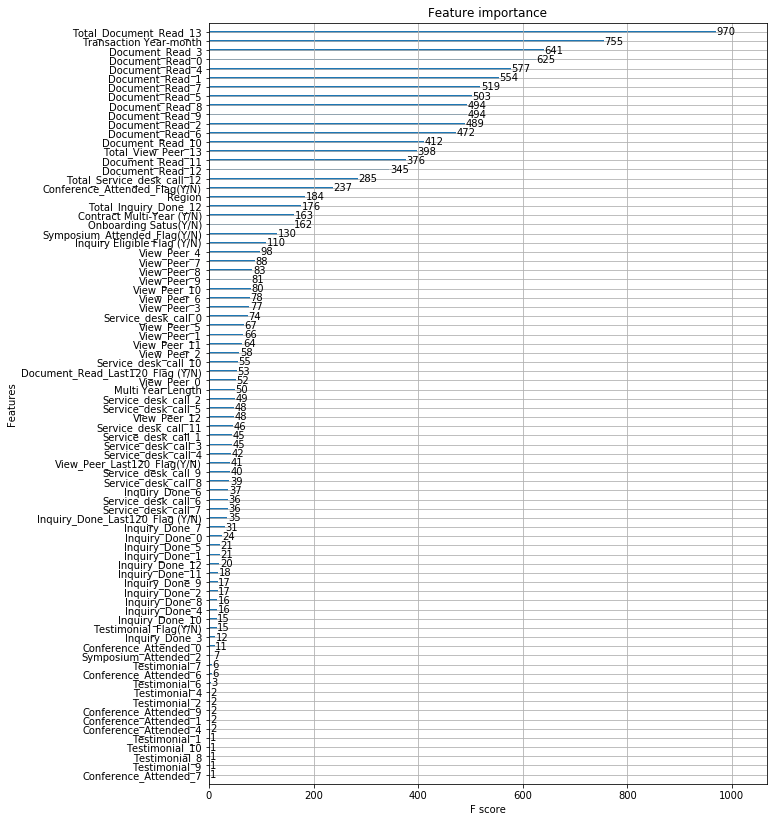

In [230]:
plot_features(model, (10,14))


In [231]:
Y_pred

array([0.98665595, 1.0537858 , 0.69839066, 1.1183847 , 0.        ,
       0.5573117 , 0.6968062 , 0.45706785, 0.9982733 , 0.9913937 ,
       0.92657995, 0.        , 0.8559314 , 0.16451994, 0.97410154,
       0.9637121 , 1.1254106 , 0.0186083 , 1.1391437 , 0.8504151 ,
       0.4954481 , 1.0064044 , 0.7504342 , 0.80520034, 0.94092214,
       0.8232739 , 0.68088526, 0.8898929 , 0.9161218 , 1.0001177 ,
       0.93214834, 0.8570689 , 0.5177644 , 0.        , 0.871088  ,
       0.8834498 , 0.9397274 , 0.8354676 , 0.83464134, 0.9639453 ,
       0.86446595, 0.68439287, 0.87479806, 0.55706686, 0.07798657,
       0.7180284 , 0.08969852, 0.80390656, 0.9251167 , 0.89510024,
       0.96797836, 1.029707  , 1.1496415 , 0.897938  , 0.8850716 ,
       0.89271784, 0.        , 1.1109095 , 0.7093872 , 1.035573  ,
       1.036223  , 0.9568156 , 0.9344262 , 0.92972296, 1.034434  ,
       0.        , 0.80190873, 1.0461259 , 0.31246394, 0.7353514 ,
       1.0405035 , 0.86514205, 0.9215019 , 0.97334576, 1.06444

In [232]:
from xgboost import XGBClassifier
ts = time.time()

model = XGBClassifier(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

[0]	validation_0-rmse:0.482867	validation_1-rmse:0.481228
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.467971	validation_1-rmse:0.464757
[2]	validation_0-rmse:0.455904	validation_1-rmse:0.451763
[3]	validation_0-rmse:0.445384	validation_1-rmse:0.440075
[4]	validation_0-rmse:0.436913	validation_1-rmse:0.431074
[5]	validation_0-rmse:0.430083	validation_1-rmse:0.423896
[6]	validation_0-rmse:0.423797	validation_1-rmse:0.417292
[7]	validation_0-rmse:0.418633	validation_1-rmse:0.412152
[8]	validation_0-rmse:0.41428	validation_1-rmse:0.407639
[9]	validation_0-rmse:0.410514	validation_1-rmse:0.403811
[10]	validation_0-rmse:0.40754	validation_1-rmse:0.400362
[11]	validation_0-rmse:0.404787	validation_1-rmse:0.397988
[12]	validation_0-rmse:0.402604	validation_1-rmse:0.395861
[13]	validation_0-rmse:0.400703	validation_1-rmse:0.393977
[14]	validation_0-rmse:0.39

[137]	validation_0-rmse:0.363372	validation_1-rmse:0.351794
[138]	validation_0-rmse:0.363159	validation_1-rmse:0.351562
[139]	validation_0-rmse:0.363047	validation_1-rmse:0.351409
[140]	validation_0-rmse:0.362954	validation_1-rmse:0.351181
[141]	validation_0-rmse:0.362796	validation_1-rmse:0.351046
[142]	validation_0-rmse:0.36258	validation_1-rmse:0.350731
[143]	validation_0-rmse:0.362473	validation_1-rmse:0.35058
[144]	validation_0-rmse:0.362358	validation_1-rmse:0.350374
[145]	validation_0-rmse:0.3621	validation_1-rmse:0.350211
[146]	validation_0-rmse:0.361971	validation_1-rmse:0.349902
[147]	validation_0-rmse:0.361866	validation_1-rmse:0.349917
[148]	validation_0-rmse:0.361731	validation_1-rmse:0.349763
[149]	validation_0-rmse:0.361615	validation_1-rmse:0.349615
[150]	validation_0-rmse:0.361508	validation_1-rmse:0.349486
[151]	validation_0-rmse:0.361405	validation_1-rmse:0.349542
[152]	validation_0-rmse:0.36128	validation_1-rmse:0.349378
[153]	validation_0-rmse:0.361178	validation_1

[274]	validation_0-rmse:0.349421	validation_1-rmse:0.331104
[275]	validation_0-rmse:0.349364	validation_1-rmse:0.330952
[276]	validation_0-rmse:0.349312	validation_1-rmse:0.330828
[277]	validation_0-rmse:0.349233	validation_1-rmse:0.33073
[278]	validation_0-rmse:0.349188	validation_1-rmse:0.330564
[279]	validation_0-rmse:0.349124	validation_1-rmse:0.330504
[280]	validation_0-rmse:0.349058	validation_1-rmse:0.330446
[281]	validation_0-rmse:0.348989	validation_1-rmse:0.330334
[282]	validation_0-rmse:0.348887	validation_1-rmse:0.330298
[283]	validation_0-rmse:0.348815	validation_1-rmse:0.330205
[284]	validation_0-rmse:0.34869	validation_1-rmse:0.329919
[285]	validation_0-rmse:0.348595	validation_1-rmse:0.329768
[286]	validation_0-rmse:0.348511	validation_1-rmse:0.329736
[287]	validation_0-rmse:0.348442	validation_1-rmse:0.329477
[288]	validation_0-rmse:0.348371	validation_1-rmse:0.32937
[289]	validation_0-rmse:0.348305	validation_1-rmse:0.32928
[290]	validation_0-rmse:0.348241	validation_

[411]	validation_0-rmse:0.34079	validation_1-rmse:0.31803
[412]	validation_0-rmse:0.340716	validation_1-rmse:0.318084
[413]	validation_0-rmse:0.340653	validation_1-rmse:0.317919
[414]	validation_0-rmse:0.340535	validation_1-rmse:0.317685
[415]	validation_0-rmse:0.340503	validation_1-rmse:0.317689
[416]	validation_0-rmse:0.34046	validation_1-rmse:0.317525
[417]	validation_0-rmse:0.340404	validation_1-rmse:0.317415
[418]	validation_0-rmse:0.340372	validation_1-rmse:0.317489
[419]	validation_0-rmse:0.340328	validation_1-rmse:0.317485
[420]	validation_0-rmse:0.340266	validation_1-rmse:0.317277
[421]	validation_0-rmse:0.340213	validation_1-rmse:0.317197
[422]	validation_0-rmse:0.340165	validation_1-rmse:0.317163
[423]	validation_0-rmse:0.340121	validation_1-rmse:0.317043
[424]	validation_0-rmse:0.340047	validation_1-rmse:0.316818
[425]	validation_0-rmse:0.340014	validation_1-rmse:0.316747
[426]	validation_0-rmse:0.339985	validation_1-rmse:0.316697
[427]	validation_0-rmse:0.339917	validation

[549]	validation_0-rmse:0.334182	validation_1-rmse:0.308259
[550]	validation_0-rmse:0.334149	validation_1-rmse:0.308087
[551]	validation_0-rmse:0.334114	validation_1-rmse:0.30803
[552]	validation_0-rmse:0.334095	validation_1-rmse:0.308043
[553]	validation_0-rmse:0.334031	validation_1-rmse:0.307931
[554]	validation_0-rmse:0.333963	validation_1-rmse:0.307767
[555]	validation_0-rmse:0.333953	validation_1-rmse:0.307808
[556]	validation_0-rmse:0.333898	validation_1-rmse:0.307714
[557]	validation_0-rmse:0.333841	validation_1-rmse:0.307557
[558]	validation_0-rmse:0.33379	validation_1-rmse:0.307397
[559]	validation_0-rmse:0.333747	validation_1-rmse:0.307275
[560]	validation_0-rmse:0.333719	validation_1-rmse:0.307171
[561]	validation_0-rmse:0.333686	validation_1-rmse:0.307122
[562]	validation_0-rmse:0.333652	validation_1-rmse:0.307079
[563]	validation_0-rmse:0.333586	validation_1-rmse:0.306806
[564]	validation_0-rmse:0.333553	validation_1-rmse:0.306786
[565]	validation_0-rmse:0.333526	validatio

[686]	validation_0-rmse:0.328738	validation_1-rmse:0.30004
[687]	validation_0-rmse:0.328698	validation_1-rmse:0.300023
[688]	validation_0-rmse:0.328678	validation_1-rmse:0.299989
[689]	validation_0-rmse:0.328651	validation_1-rmse:0.299971
[690]	validation_0-rmse:0.328607	validation_1-rmse:0.29993
[691]	validation_0-rmse:0.328575	validation_1-rmse:0.300013
[692]	validation_0-rmse:0.32856	validation_1-rmse:0.299928
[693]	validation_0-rmse:0.328543	validation_1-rmse:0.299934
[694]	validation_0-rmse:0.328489	validation_1-rmse:0.299909
[695]	validation_0-rmse:0.328461	validation_1-rmse:0.299904
[696]	validation_0-rmse:0.328383	validation_1-rmse:0.299716
[697]	validation_0-rmse:0.328358	validation_1-rmse:0.299549
[698]	validation_0-rmse:0.328337	validation_1-rmse:0.299452
[699]	validation_0-rmse:0.32831	validation_1-rmse:0.299453
[700]	validation_0-rmse:0.3283	validation_1-rmse:0.299407
[701]	validation_0-rmse:0.328274	validation_1-rmse:0.299281
[702]	validation_0-rmse:0.328248	validation_1-

[824]	validation_0-rmse:0.324275	validation_1-rmse:0.294153
[825]	validation_0-rmse:0.324256	validation_1-rmse:0.294199
[826]	validation_0-rmse:0.324238	validation_1-rmse:0.294132
[827]	validation_0-rmse:0.324217	validation_1-rmse:0.294093
[828]	validation_0-rmse:0.324192	validation_1-rmse:0.294099
[829]	validation_0-rmse:0.324156	validation_1-rmse:0.294136
[830]	validation_0-rmse:0.324128	validation_1-rmse:0.29417
[831]	validation_0-rmse:0.324105	validation_1-rmse:0.294101
[832]	validation_0-rmse:0.32408	validation_1-rmse:0.294058
[833]	validation_0-rmse:0.323996	validation_1-rmse:0.293968
[834]	validation_0-rmse:0.323969	validation_1-rmse:0.293913
[835]	validation_0-rmse:0.323952	validation_1-rmse:0.293949
[836]	validation_0-rmse:0.323916	validation_1-rmse:0.293862
[837]	validation_0-rmse:0.3239	validation_1-rmse:0.293824
[838]	validation_0-rmse:0.323868	validation_1-rmse:0.293807
[839]	validation_0-rmse:0.323849	validation_1-rmse:0.293749
[840]	validation_0-rmse:0.323823	validation_

[962]	validation_0-rmse:0.320487	validation_1-rmse:0.288708
[963]	validation_0-rmse:0.32044	validation_1-rmse:0.288574
[964]	validation_0-rmse:0.320428	validation_1-rmse:0.288509
[965]	validation_0-rmse:0.320398	validation_1-rmse:0.288521
[966]	validation_0-rmse:0.32037	validation_1-rmse:0.28855
[967]	validation_0-rmse:0.32035	validation_1-rmse:0.28854
[968]	validation_0-rmse:0.320329	validation_1-rmse:0.288596
[969]	validation_0-rmse:0.32032	validation_1-rmse:0.288605
[970]	validation_0-rmse:0.3203	validation_1-rmse:0.288527
[971]	validation_0-rmse:0.320264	validation_1-rmse:0.288467
[972]	validation_0-rmse:0.320257	validation_1-rmse:0.288471
[973]	validation_0-rmse:0.320206	validation_1-rmse:0.288397
[974]	validation_0-rmse:0.320185	validation_1-rmse:0.288397
[975]	validation_0-rmse:0.320154	validation_1-rmse:0.288329
[976]	validation_0-rmse:0.320141	validation_1-rmse:0.288335
[977]	validation_0-rmse:0.320091	validation_1-rmse:0.288164
[978]	validation_0-rmse:0.320083	validation_1-rm

107.85409617424011

In [233]:
Y_pred_cls = model.predict(X_test)

/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [238]:
np.where(Y_train == 1)[0].shape

(22578,)

In [237]:
np.where(Y_pred_cls == 1)[0].shape

(5708,)

In [239]:
Y_pred_cls

array([1, 1, 1, ..., 1, 0, 1], dtype=int16)

In [130]:
evals_result = model.evals_result()


In [131]:
evals_result

{'validation_0': {'rmse': [0.482552,
   0.467721,
   0.455364,
   0.445956,
   0.43732,
   0.430021,
   0.424682,
   0.41942,
   0.415115,
   0.411498,
   0.408521,
   0.405643,
   0.403245,
   0.401395,
   0.399615,
   0.398153,
   0.396977,
   0.395897,
   0.394854,
   0.394042,
   0.393197,
   0.392512,
   0.391874,
   0.391227,
   0.390692,
   0.390163,
   0.38967,
   0.38921,
   0.388789,
   0.388419,
   0.388034,
   0.387672,
   0.387406,
   0.387092,
   0.386724,
   0.386425,
   0.386113,
   0.385787,
   0.385441,
   0.38515,
   0.384712,
   0.384387,
   0.384067,
   0.383803,
   0.383524,
   0.383171,
   0.382717,
   0.382469,
   0.382202,
   0.381666,
   0.381294,
   0.381121,
   0.380697,
   0.380458,
   0.380195,
   0.379974,
   0.379781,
   0.37952,
   0.379321,
   0.378959,
   0.378424,
   0.377987,
   0.377683,
   0.377443,
   0.37709,
   0.376729,
   0.37644,
   0.376215,
   0.376038,
   0.375732,
   0.375384,
   0.375229,
   0.374792,
   0.374623,
   0.374347,
   0.3741

In [132]:
# Y_pred = model.predict(X_valid).clip(0, 20)

/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


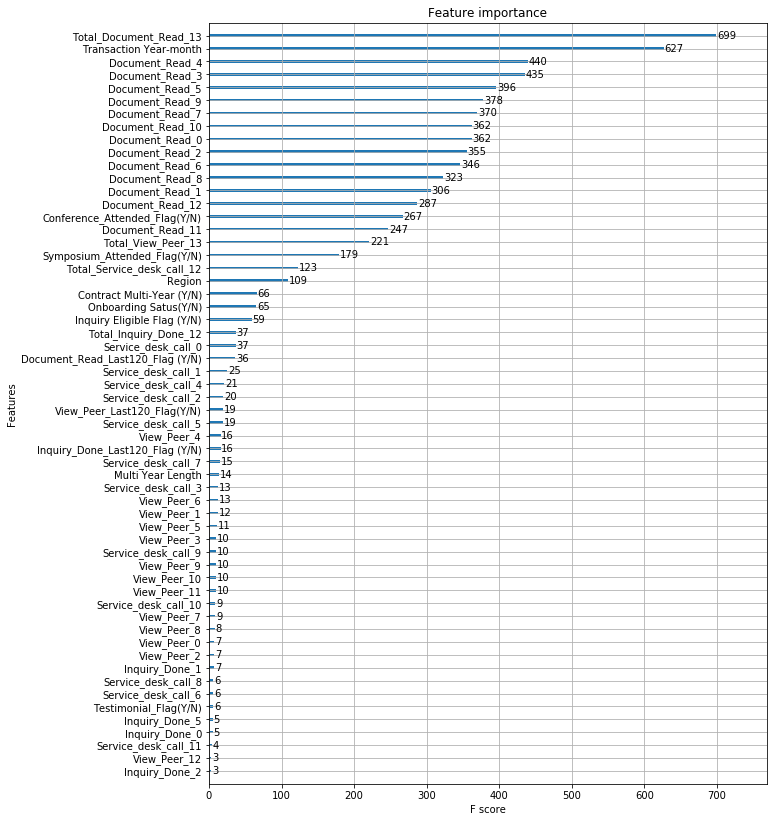

In [240]:
plot_features(model, (10,14))

In [241]:
sub = pd.read_csv('sample_submission84eff4f.csv')

In [242]:
sub.head()

,Unique Client Key,Retention Status
0,SER53746,Retained
1,SER53747,Retained
2,SER53748,Retained
3,SER53749,Retained
4,SER53750,Retained


In [244]:
import os
os.listdir('dataset')

['test.csv', 'data_dictionary.csv', 'train.csv']

In [251]:
test = pd.read_csv('dataset/test.csv')

In [269]:
temp = pd.read_csv('dataset/train.csv')
temp['Retention Status'].unique()

/home/ankish/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,27,42,57,71,84,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['Retained', 'Dropped'], dtype=object)

In [252]:
testing = test.copy()

In [253]:
testing.columns

Index(['Unique Client Key', 'Region', 'Plan Start Year-month',
       'Transaction Year-month', 'Business Unit (EU or HTTP)',
       'Contract Ending Date', 'Seat Registration Date',
       'Contract Multi-Year (Y/N)', 'Multi-Year In', 'Multi Year Length',
       ...
       '1:1_Meeting_6', '1:1_Meeting_5', '1:1_Meeting_4', '1:1_Meeting_3',
       '1:1_Meeting_2', '1:1_Meeting_1', '1:1_Meeting_0',
       'Total_1:1_Meeting_12', 'Month_Contract_Period',
       'Onboarding Satus(Y/N)'],
      dtype='object', length=123)

In [265]:
testing = pd.DataFrame(data = test['Unique Client Key'], columns=['Unique Client Key'])

In [267]:
testing['Retention Status'] = Y_pred_cls

In [270]:
testing['test'] = testing['Retention Status']
testing['test'] = np.where(testing['Retention Status']==1, 'Retained','Dropped')

In [271]:
del temp
gc.collect()

609

In [273]:
testing['Retention Status'] = testing['test']
testing = testing.drop('test',axis=1)

In [276]:
testing.head()

,Unique Client Key,Retention Status
0,SER53746,Retained
1,SER53747,Retained
2,SER53748,Retained
3,SER53749,Retained
4,SER53750,Retained


In [277]:
sub.head()

,Unique Client Key,Retention Status
0,SER53746,Retained
1,SER53747,Retained
2,SER53748,Retained
3,SER53749,Retained
4,SER53750,Retained


In [278]:
testing.columns,sub.columns

(Index(['Unique Client Key', 'Retention Status'], dtype='object'),
 Index(['Unique Client Key', 'Retention Status'], dtype='object'))

In [280]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Unique Client Key    5 non-null object
Retention Status     5 non-null object
dtypes: object(2)
memory usage: 160.0+ bytes


In [281]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 2 columns):
Unique Client Key    6910 non-null object
Retention Status     6910 non-null object
dtypes: object(2)
memory usage: 108.0+ KB


In [275]:
testing.to_csv('submission.csv')

In [248]:
test.shape, Y_pred_cls.shape

((6910,), (6910,))

In [249]:
test.head()

0    SER53746
1    SER53747
2    SER53748
3    SER53749
4    SER53750
Name: Unique Client Key, dtype: object

In [250]:
Y_pred_cls

array([1, 1, 1, ..., 1, 0, 1], dtype=int16)

In [134]:
from sklearn.model_selection import cross_val_score

xclas = XGBClassifier()  # and for classifier  
xclas.fit(X_train, Y_train)  
xclas.predict(X_valid)  

# and as I said, since it expose scikit-learn API, you can use as any other classifier:

cross_val_score(xclas, X_train, Y_train)  


/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

array([0.79363567, 0.80859375, 0.8031256 ])

In [136]:
import scipy.stats as st
st.randn(0.12,0.6)

AttributeError: module 'scipy.stats' has no attribute 'randn'

In [ ]:
# from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(500, 1000),
    "max_depth": st.randint(3, 20),
#     "eta":0.3,
#     "seed":42,
    "learning_rate": st.uniform(0.4, 0.8),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}
'''    
max_depth=8,
n_estimators=1000,
min_child_weight=300, 
colsample_bytree=0.8, 
subsample=0.8, 
eta=0.3,    
seed=42)
'''
xgbreg = XGBRegressor(nthreads=-1,seed=42)  

# and then just plug it into RS:

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
# gs.fit(X_train, Y_train,
#        eval_metric="rmse",
#        eval_set=[(X_valid, Y_valid)],
#        verbose=True,
#        early_stopping_rounds = 10)  
gs.fit(X_train,Y_train)
gs.best_model_  
